In [60]:
!pip install -U scikit-learn
!python -m pip show scikit-learn      # to know the version

!pip install -U install pandas
!pip install -U install numpy
!pip install -U install matplotlib
!pip install -U install seaborn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\user\appdata\local\programs\python\python310\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: mglearn, seqeval, sklearn


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\USER\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\numpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.




  Using cached numpy-1.26.2-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.2-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
  Rolling back uninstall of numpy
  Moving to c:\users\user\appdata\local\programs\python\python310\lib\site-packages\numpy-1.24.2.dist-info\
   from C:\Users\USER\AppData\Local\Programs\Python\Python310\Lib\site-packages\~umpy-1.24.2.dist-info
  Moving to c:\users\user\appdata\local\programs\python\python310\lib\site-packages\numpy\.libs\
   from C:\Users\USER\AppData\Local\Programs\Python\Python310\Lib\site-packages\numpy\~libs
  Moving to c:\users\user\appdata\local\programs\python\python310\lib\site-packages\numpy\__config__.py
   from C:\Users\USER\AppData\Local\Temp\pip-uninstall-rlzhnhmv\__config__.py
  Moving to c:\users\user\appdata\local\programs\python\python310\lib\site-packages\numpy\__init__.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# homeowner: 1 for yes, 0 for no
# marital status: 1 for single, 0 for married
# annual income
# defaulted borrower
data = [
    ['1', '1', 125, 0],
    ['0', '0', 100, 0],
    ['0', '1', 70, 0],
    ['1', '0', 120, 0],
    ['0', '1', 95, 1],
    ['0', '0', 60, 0],
    ['1', '1', 220, 0],
    ['0', '1', 85, 1],
    ['0', '0', 75, 0],
    ['0', '1', 90, 1]
]

df = pd.DataFrame(data, columns = ['Homeowner', 'Marital Status', 'Annual Income', 'Defaulted Borrower'])

In [85]:
df

,Homeowner,Marital Status,Annual Income,Defaulted Borrower
0,1,1,125,0
1,0,0,100,0
2,0,1,70,0
3,1,0,120,0
4,0,1,95,1
5,0,0,60,0
6,1,1,220,0
7,0,1,85,1
8,0,0,75,0
9,0,1,90,1


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Homeowner           10 non-null     object
 1   Marital Status      10 non-null     object
 2   Annual Income       10 non-null     int64 
 3   Defaulted Borrower  10 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [89]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
                        np.array(df.loc[:, df.columns != 'Defaulted Borrower']),
                        np.array(df['Defaulted Borrower']),
                        test_size=0.3)
len(x_train),len(x_test)


(7, 3)

In [90]:
x_test

array([['0', '0', 60],
       ['0', '1', 90],
       ['1', '1', 220]], dtype=object)

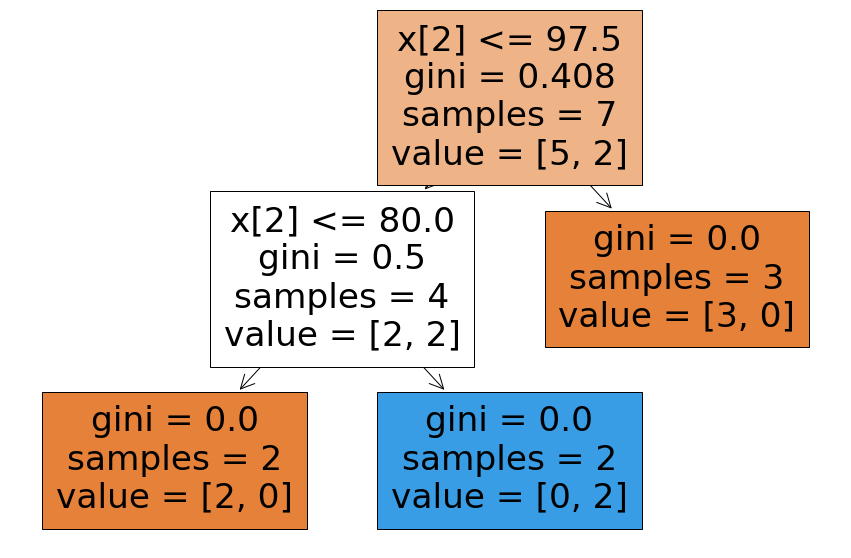

In [93]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)

#plot tree
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(x_train, y_train)  ,filled=True)
plt.show()